<a href="https://colab.research.google.com/github/ErikSeguinte/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####

import pandas as pd

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
pd.set_option('display.max_rows', 400)

In [0]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [0]:
df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

In [0]:
import numpy as np

type(np.NaN)

float

## Making new features

In [0]:
small_df = df[["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", 'SalePrice']].copy()

In [0]:
small_df['TotalSquareFootage'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
small_df['PricePerSqFt'] = small_df['SalePrice'] / small_df['TotalSquareFootage']

In [0]:
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


## Lending Club

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip


--2020-01-17 20:33:48--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [          <=>       ]  21.72M  1.29MB/s    in 17s     

2020-01-17 20:34:05 (1.28 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22776791]



In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [0]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","3686.37","3686.37","2652.39","2652.39","1913.63","738.76","0.0","0.0","0.0","Dec-2019","190.21","Jan-2020","Nov-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(df.shape)
df.head()

(128400, 1)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title           emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt     total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       6000      6000        6000             36 months  14.47%  206.44      C     C2        Manager             10+ years  RENT           55000      Verified            Dec-2018 Charged Off n          NaN NaN  credit_card        Credit card refinancing 104xx    NY         10.65 0           Jun-2006         0              NaN                    NaN                    6        0       4196      91.2%      8         w                   0.00      0.00          1106.52         1106.52         546.14          272.38        0.0                288.0      51.84                   Apr-2019     206.44          NaN          Nov-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            12514       0           2           1           1           9                  8318         74      1           1           2807       79       4600             1      0           2            2                    2086        344            92      0                        0           33                 150                  9                     9              0        9                    NaN                      9                     NaN                            0                     3              4               3           3         3         4             5             4                   6        0                0            0                  2                  100            100        

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000.0,6000.0,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,104xx,NY,10.65,0.0,Jun-2006,0.0,NaN,NaN,6.0,0.0,4196.0,91.2%,8.0,w,0.00,0.00,1106.520000,1106.52,...,100.0,0.0,0.0,15800.0,12514.0,4300.0,11200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,NaN,NaN,24000.0,24000.0,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,19.14,0.0,Oct-1996,3.0,39.0,NaN,14.0,0.0,8547.0,27.7%,28.0,w,16807.30,16807.30,9317.020000,9317.02,...,16.7,0.0,0.0,335121.0,50686.0,25900.0,61514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000.0,30000.0,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,22.23,0.0,May-2007,1.0,NaN,NaN,8.0,0.0,25754.0,48%,23.0,w,0.00,0.00,30883.673712,30883.67,...,50.0,0.0,0.0,89849.0,51370.0,41600.0,36249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8000.0,8000.0,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,480xx,MI,9.44,0.0,Mar-2009,2.0,73.0,NaN,7.0,0.0,11434.0,33.3%,20.0,w,1707.34,1707.34,6855.630000,6855.63,...,20.0,0.0,0.0,271550.0,25150.0,34300.0,14000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22400.0,22400.0,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,234xx,VA,18.47,0.0,Dec-2004,0.0,75.0,NaN,15.0,0.0,13555.0,38.2%,22.0,w,19230.91,19230.91,6526.670000,6526.67,...,25.0,0.0,0.0,253539.0,32070.0,28200.0,23364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.isnull().sum().sort_values()

inq_fi                                             2
delinq_amnt                                        2
chargeoff_within_12_mths                           2
acc_open_past_24mths                               2
inq_last_12m                                       2
total_cu_tl                                        2
total_rev_hi_lim                                   2
max_bal_bc                                         2
open_rv_24m                                        2
open_rv_12m                                        2
total_bal_il                                       2
open_il_24m                                        2
hardship_flag                                      2
open_act_il                                        2
open_acc_6m                                        2
tot_cur_bal                                        2
tot_coll_amt                                       2
acc_now_delinq                                     2
application_type                              

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', 
                 skiprows=1, 
                 skipfooter=2, 
                 engine='python')

print(df.shape)
df.head()

(128397, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,...,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,NaN,NaN,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,...,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,...,50.0,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,...,20.0,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,...,25.0,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.isnull().sum().sort_values(ascending=False)

id                                            128397
desc                                          128397
member_id                                     128397
url                                           128397
orig_projected_additional_accrued_interest    128191
hardship_type                                 128164
hardship_last_payment_amount                  128164
hardship_payoff_balance_amount                128164
hardship_reason                               128164
hardship_loan_status                          128164
hardship_dpd                                  128164
hardship_length                               128164
payment_plan_start_date                       128164
hardship_end_date                             128164
hardship_start_date                           128164
hardship_amount                               128164
deferral_term                                 128164
hardship_status                               128164
settlement_percentage                         

In [0]:
df = df.drop(['url', 'member_id', 'desc', 'id'], axis = 1).copy()
print(df.shape)
df.head()

(128397, 140)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,50.0,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,20.0,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,25.0,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


## Clean up `int rate`

In [0]:
df['int_rate'].head()

0     14.47%
1     10.33%
2     15.02%
3     12.98%
4     16.14%
Name: int_rate, dtype: object

In [0]:
df['int_rate'][0]

' 14.47%'

In [0]:
df['int_rate_float'] = df['int_rate'].apply(lambda x: float(x.strip().strip('%')))

In [0]:
df['int_rate_float'].head()

0    14.47
1    10.33
2    15.02
3    12.98
4    16.14
Name: int_rate_float, dtype: float64

## Employment Title

In [0]:
df['emp_title'].value_counts(dropna=False, ascending=False)[:20]

NaN                   20942
Teacher                2090
Manager                1773
Registered Nurse        951
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title'].head()

0                    Manager
1        Maintenance Manager
2                Firefighter
3                 Controller
4    Paramedic/ Fire Fighter
Name: emp_title, dtype: object

## Datetime

In [0]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
df['issue_d'][:10]

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
6    Dec-2018
7    Dec-2018
8    Dec-2018
9    Dec-2018
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
df.dtypes[:15]

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
dtype: object

In [0]:
df['issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [0]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
df['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128392    2018
128393    2018
128394    2018
128395    2018
128396    2018
Name: issue_d, Length: 128397, dtype: int64

In [0]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,issue_year,issue_month
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12


In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)

In [0]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line'])

In [0]:
df['days_from_earliest_credit_to_issue'].head()

0   4566 days
1   8096 days
2   4232 days
3   3562 days
4   5113 days
Name: days_from_earliest_credit_to_issue, dtype: timedelta64[ns]

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

## Lending Club

### Removing Percent Signs

In [0]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,issue_year,issue_month,days_from_earliest_credit_to_issue
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,2006-06-01,0,NaN,NaN,6,0,4196,91.2%,8,w,0.0,0.0,1106.52,1106.52,546.14,272.38,0.0,288.0,...,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12,4566 days
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,1996-10-01,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.3,16807.3,9317.02,9317.02,7192.70,2124.32,0.0,0.0,...,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12,8096 days


In [0]:
df['revol_util'].head(20)

0     91.2%
1     27.7%
2       48%
3     33.3%
4     38.2%
5      9.4%
6     64.8%
7     48.5%
8       21%
9     31.8%
10     4.3%
11      32%
12    19.2%
13    19.1%
14    73.7%
15    24.8%
16    65.5%
17    37.2%
18    83.1%
19    37.5%
Name: revol_util, dtype: object

In [0]:
df['revol_util'][0]

'91.2%'

In [0]:
df['revol_util'].isna().sum()

156

In [0]:
def clean_revol(value):
  ''' Returns string as a float if not NA, else return 0.0'''

  if isinstance(value, str):
    return float(value.strip('%').strip())
  else:
    return float(0.0)

In [0]:
df['revol_util_clean'] = df["revol_util"].apply(clean_revol)

In [0]:
df['revol_util_clean'].isna().sum()

0

In [0]:
df['revol_util_clean'].head()

0    91.2
1    27.7
2    48.0
3    33.3
4    38.2
Name: revol_util_clean, dtype: float64

### Emp Title

* Assumptions made:
 * Unknown is ignored for purposes of most common job

In [0]:
top_20 = df['emp_title'].value_counts()[:21].index.tolist()
print(top_20)

['Unknown', 'Teacher', 'Manager', 'Registered Nurse', 'Driver', 'Supervisor', 'Truck Driver', 'Rn', 'Office Manager', 'Sales', 'General Manager', 'Project Manager', 'Owner', 'Director', 'Operations Manager', 'Sales Manager', 'Police Officer', 'Nurse', 'Technician', 'Engineer', 'Administrative Assistant']


In [0]:
def to_other(title):
  if title == "Unknown":
    return title
  
  if title in top_20:
    return title
  else:
    return "Other"

In [0]:
df['emp_title_other'] = df['emp_title'].apply(to_other)

In [0]:
df['emp_title_other'].value_counts()

Other                       89525
Unknown                     20942
Teacher                      2557
Manager                      2395
Registered Nurse             1417
Driver                       1258
Supervisor                   1160
Truck Driver                  920
Rn                            834
Office Manager                804
Sales                         803
General Manager               791
Project Manager               720
Owner                         625
Director                      523
Operations Manager            518
Sales Manager                 500
Police Officer                440
Nurse                         424
Technician                    420
Engineer                      412
Administrative Assistant      409
Name: emp_title_other, dtype: int64

## Instacart

You can uncomment and run the cells below to re-download and extract the Instacart data

In [3]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-18 01:32:23--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.240.118
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.240.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  65.8MB/s    in 3.0s    

2020-01-18 01:32:26 (65.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [4]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [5]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [6]:
!ls

aisles.csv	 order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


In [0]:
orders_prior = pd.read_csv('order_products__prior.csv')

In [8]:
orders_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
orders = pd.read_csv('orders.csv')

In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [14]:
products_df = pd.read_csv('products.csv')
products_df.head() 

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


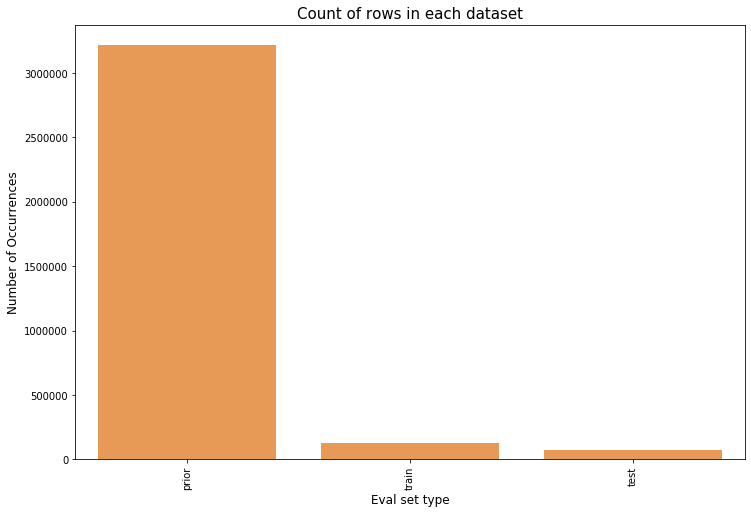

In [20]:
count_series = orders['eval_set'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count_series.index, count_series.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [0]:
def get_unique_count(x):
  return len(np.unique(x))

In [26]:
count_series = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
count_series

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

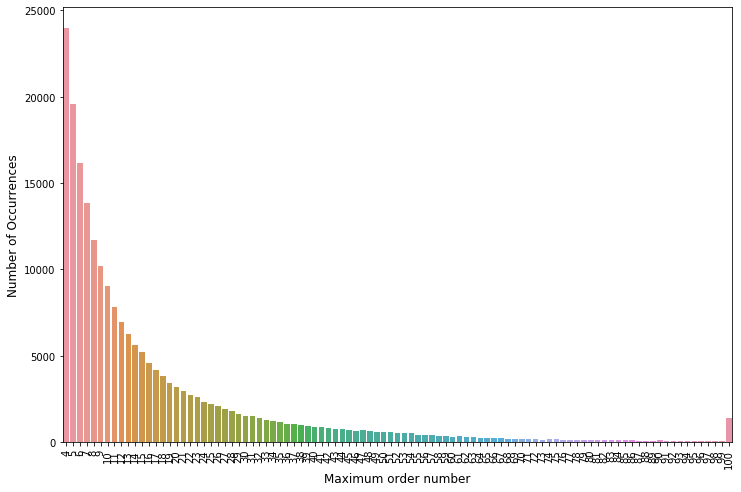

In [39]:
count_series = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()

count_series = count_series["order_number"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(count_series.index, count_series.values)

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show();

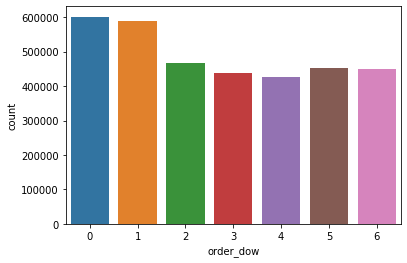

In [41]:
sns.countplot(x = "order_dow", data = orders)

plt.show()